In [5]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
 
# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [6]:
import os 
os.getcwd()

'/Users/jiongwei/Documents/CIFAR10'

In [7]:
seed = 7
np.random.seed(seed)

In [8]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [9]:
batch_data_dir  = os.getcwd() + '/data'
X_train = pd.DataFrame()
Y_train = pd.DataFrame()
X_test = pd.DataFrame()
Y_test = pd.DataFrame()
for i in os.listdir(batch_data_dir):
    if i.startswith('data'):
        data = unpickle(batch_data_dir + '/' + str(i))
        print(data.keys())
        x = pd.DataFrame(data[b'data'])
        y = pd.DataFrame(data[b'labels'])
        Y_train = Y_train.append(y)
        X_train = X_train.append(x)
    elif i.startswith('test'):
        X_test = pd.DataFrame(data[b'data'])
        Y_test = pd.DataFrame(data[b'labels'])

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(Y_train.head())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)
   0
0  6
1  9
2  9
3  4
4  1


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
print(np.unique(Y_train), Y_train.shape)

[0 1 2 3 4 5 6 7 8 9] (50000, 1)


In [12]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [13]:
print(Y_train.shape, Y_test.shape)

(50000, 10) (10000, 10)


In [14]:
X_train_reshape = X_train.values.reshape((50000,32,32,3))

In [15]:
X_test_reshape = X_test.values.reshape((10000,32,32,3))

In [16]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [17]:
model.fit(X_train_reshape, Y_train, validation_data=(X_test_reshape, Y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 42s 833us/step - loss: 1.8848 - acc: 0.3048 - val_loss: 1.6708 - val_acc: 0.4004
Epoch 2/50
50000/50000 [==============================] - 38s 758us/step - loss: 1.6501 - acc: 0.4032 - val_loss: 1.5097 - val_acc: 0.4582
Epoch 3/50
50000/50000 [==============================] - 37s 731us/step - loss: 1.5548 - acc: 0.4394 - val_loss: 1.4678 - val_acc: 0.4800
Epoch 4/50
50000/50000 [==============================] - 37s 741us/step - loss: 1.4981 - acc: 0.4593 - val_loss: 1.3677 - val_acc: 0.5138
Epoch 5/50
50000/50000 [==============================] - 37s 736us/step - loss: 1.4511 - acc: 0.4769 - val_loss: 1.3529 - val_acc: 0.5121
Epoch 6/50
50000/50000 [==============================] - 37s 735us/step - loss: 1.4111 - acc: 0.4924 - val_loss: 1.3413 - val_acc: 0.5189
Epoch 7/50
50000/50000 [==============================] - 36s 728us/step - loss: 1.3785 - acc: 0.5010 - val_loss: 1.

In [18]:
model.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

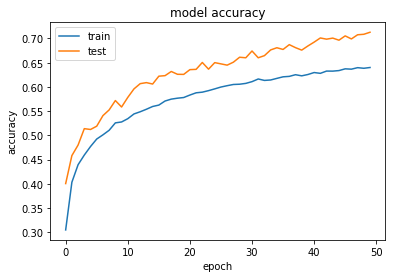

In [19]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
def visualize_image(X,id):
	rgb = X.iloc[id,:].values
	#print(rgb.shape)
	img = rgb.reshape(3,32,32).transpose([1, 2, 0])
	#print(img.shape)
	plt.imshow(img)

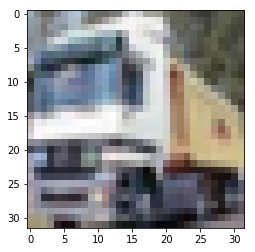

In [21]:
visualize_image(X_train,1)

In [22]:
prediction = np.argmax(model.predict(X_train_reshape[1].reshape(1,32,32,3)))

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
rnn_cn = confusion_matrix(model.predict_classes(X_test_reshape), np.argmax(Y_test, axis=1))

In [27]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

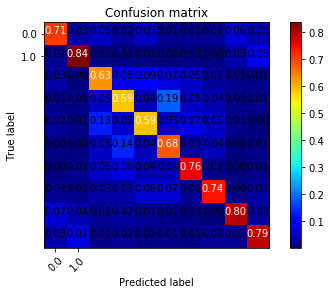

In [28]:
plot_confusion_matrix(rnn_cn, classes = np.unique(Y_train))

In [29]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
